# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
browser_html = browser.html
soup_html = soup(browser_html, 'html.parser')
soup_html

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [6]:
# Extract all rows of data
all_rows = soup_html.find_all('tr')
print(all_rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
list_of_all_rows = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    row_data = row.find_all('td')
    row_data_text = [cell.text for cell in row_data]
    list_of_all_rows.append(row_data_text)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Columns as described above:
#* `id`: the identification number of a single transmission from the Curiosity rover
#* `terrestrial_date`: the date on Earth
#* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
#* `ls`: the solar longitude
#* `month`: the Martian month
#* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
#* `pressure`: The atmospheric pressure at Curiosity's location

# Defining the dataframe, columns, and inputting the list of rows using pandas
mars_df = pd.DataFrame(list_of_all_rows, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Dropping the first row of the dataframe
mars_df = mars_df.dropna(how = 'all')

# Resetting/dropping index
mars_df = mars_df.reset_index(drop = True)

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [20]:
# Change data types for data analysis

# Change id to integer
mars_df['id'] = mars_df['id'].astype(int)

# Change terrestrial_date to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Change sol to integer
mars_df['sol'] = mars_df['sol'].astype(int)

# Change ls to float
mars_df['ls'] = mars_df['ls'].astype(float)

# Change month to integer
mars_df['month'] = mars_df['month'].astype(int)

# Change min_temp to float
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Change pressure to float
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [21]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 80.3 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
# To find this use the nunique() function to find the number of unique months in the month column
no_of_months_on_mars = mars_df['month'].nunique() 
print(f'From the data we can identify Mars having {no_of_months_on_mars} unique months.')

From the data we can identify Mars having 12 unique months.


In [23]:
# 2. How many Martian days' worth of data are there?
# To find this use the nunique() function to find the number of unique sols in the sol column
no_of_martian_days = mars_df['sol'].nunique()
print(f'From the data we can identify Mars having {no_of_martian_days} unique Martian days.')

From the data we can identify Mars having 1867 unique Martian days.


In [29]:
# 3. What is the average low temperature by month?

# To do this we need to group the data by month and then find the average of the min_temp column
min_temp_by_month_on_mars = mars_df.groupby('month')['min_temp'].mean()

# Create a DataFrame to display the results
min_temp_df = pd.DataFrame(min_temp_by_month_on_mars)

# Rename the column to reflect the data:
# min_temp to avg_min_temp
min_temp_df = min_temp_df.rename(columns = {'min_temp': 'avg_min_temp_on_mars'})

# Print title for the Dataframe
print('Average Low Temperature by Month on Mars')
print('---------------------------------------')

# Display the DataFrame
print(min_temp_df)

Average Low Temperature by Month on Mars
---------------------------------------
       avg_min_temp_on_mars
month                      
1                -77.160920
2                -79.932584
3                -83.307292
4                -82.747423
5                -79.308725
6                -75.299320
7                -72.281690
8                -68.382979
9                -69.171642
10               -71.982143
11               -71.985507
12               -74.451807


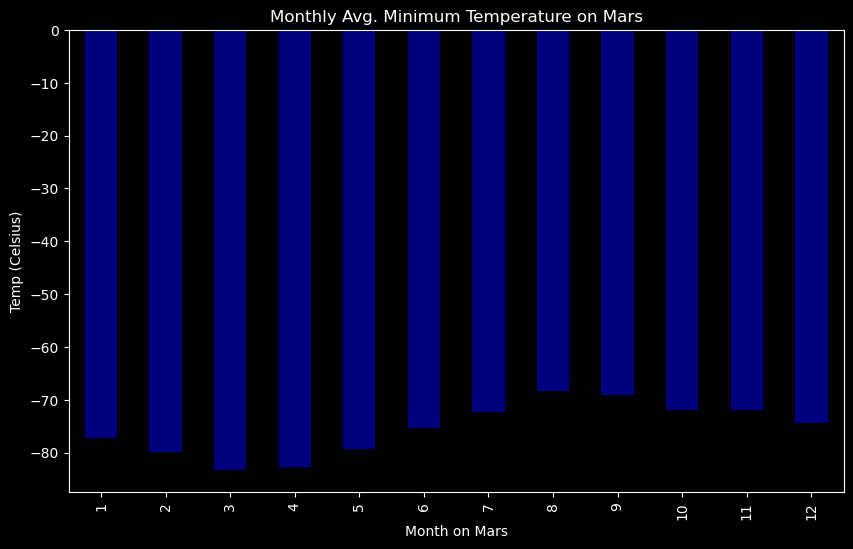

In [30]:
# Plot the average temperature by month
min_temp_df.plot(kind = 'bar', figsize = (10, 6), color = 'blue', alpha = 0.5, legend = False)
plt.xlabel('Month on Mars')
plt.ylabel('Temp (Celsius)')
plt.title('Monthly Avg. Minimum Temperature on Mars')

# Display plot
plt.show()

In [33]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = min_temp_df['avg_min_temp_on_mars'].idxmin()
hottest_month = min_temp_df['avg_min_temp_on_mars'].idxmax()

# Print the coldest and hootest months
print(f'The coldest month on Mars is month #{coldest_month} and the hottest month on Mars is month #{hottest_month}.')

The coldest month on Mars is month #3 and the hottest month on Mars is month #8.


In [34]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_df = pd.DataFrame(avg_pressure_by_month)

# Rename the column to reflect the data:
# pressure to avg_pressure
avg_pressure_df = avg_pressure_df.rename(columns = {'pressure': 'avg_pressure_on_mars'})

# Print title for the Dataframe
print('Average Pressure by Month on Mars')
print('---------------------------------------')

# Display the DataFrame
print(avg_pressure_df)

Average Pressure by Month on Mars
---------------------------------------
       avg_pressure_on_mars
month                      
1                862.488506
2                889.455056
3                877.322917
4                806.329897
5                748.557047
6                745.054422
7                795.105634
8                873.829787
9                913.305970
10               887.312500
11               857.014493
12               842.156627


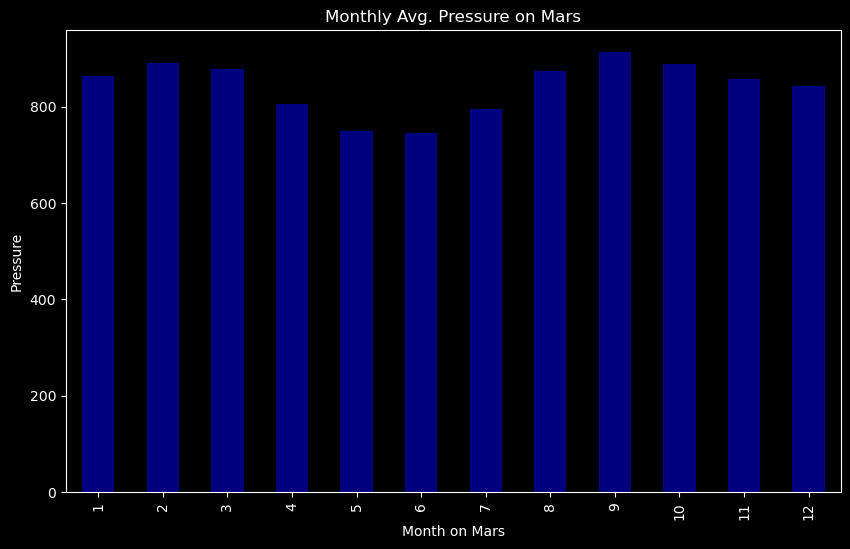

In [35]:
# Plot the average pressure by month
avg_pressure_df.plot(kind = 'bar', figsize = (10, 6), color = 'blue', alpha = 0.5, legend = False)

# Add labels and title
plt.xlabel('Month on Mars')
plt.ylabel('Pressure')
plt.title('Monthly Avg. Pressure on Mars')

# Display plot
plt.show()

In [42]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Order mars_df by terristrial date
mars_df = mars_df.sort_values(by = 'terrestrial_date')

# Find the first row where month = 1 and the previous row has month = 12
# Use iloc[0] so that it is the first instance of this happening.
first_year_start = mars_df[(mars_df['month'] == 1) & (mars_df['month'].shift(1) == 12)].iloc[0]['terrestrial_date']

# Find the next row where month = 1 and the previous row has month = 12
# Use iloc[1] so that it is the second instance of this happening, which is the first time in the dataset where it will be a full year (since the data starts in Mars Month = 6)
second_year_start = mars_df[(mars_df['month'] == 1) & (mars_df['month'].shift(1) == 12)].iloc[1]['terrestrial_date']

# Calculate the difference between the two dates to find the number of days in a Martian year
days_in_martian_year = (second_year_start - first_year_start).days

# Print the result
print(f'There are {days_in_martian_year} earth days in a Martian year.')

There are 687 earth days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index = False)

In [44]:
browser.quit()